# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('../Data Prep/cleaned file/final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
df.shape

(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
# seperate input features in x
x = df.drop('price', axis= 1)
# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [6]:
# import module train test split
from sklearn.model_selection import train_test_split
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify= df['property_type_Condo'], test_size= 0.2, random_state=123)

In [7]:
x_train.shape, y_train.shape

((1490, 13), (1490,))

In [8]:
# train your model
lrmodel = LinearRegression().fit(x_train,y_train)

In [9]:
lrmodel.coef_

array([ 7.94782249e+03, -1.23685277e+02,  1.73259162e+03,  3.09204982e+03,
        3.71800080e+03,  1.13587976e+01,  4.53048414e+03,  1.31250791e-01,
       -1.23172838e+04, -1.59643541e+03, -4.58904555e+04,  3.41733835e+03,
       -2.50853861e+04])

In [10]:
lrmodel.intercept_

-24796201.796427306

In [11]:
# make preditions on train set
ypred = lrmodel.predict(x_test)
ypred

array([ 280267.95860252,  397447.86641348,  349884.14074479,
        475198.2599156 ,  362711.97506832,  310613.69473866,
        471135.78587503,  485899.68975345,  497705.26757635,
        490684.09146701,  347402.57415499,  370956.59632768,
        485288.62553829,  518009.0189364 ,  804136.71697289,
        428019.34016943,  436724.31972826,  265536.15943165,
        348545.89833555,  396966.64223499,  332087.64437995,
        389521.62747181,  326748.83581567,  427643.94911984,
        518050.89580003,  282825.70584153,  457326.51423363,
        379804.13798464,  387947.41265793,  438710.51187934,
        534312.46221875,  262861.05332229,  356122.37389655,
        298181.94110535,  503129.53655129,  476596.0056401 ,
        361135.80451762,  305816.01974449,  271016.87396887,
        408383.92493368,  643525.60045106,  425169.5673804 ,
        447501.63253358,  461210.20744269,  519291.07458204,
        499330.21975401,  387887.0213507 ,  440381.8625479 ,
        571320.00438721,

In [12]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error


In [13]:
# train_mae = mean_absolute_error(y_test, ypred)
# print('Train error is', train_mae)

In [14]:
# make predictions on test set
test_mae = mean_absolute_error(y_test, ypred)

#evaluate the model
print('Test error is', test_mae)

Test error is 89209.40588392885


In [19]:
xpred = lrmodel.predict(x_train)
train_mae = mean_absolute_error(y_train, xpred)

In [20]:
train_mae

83398.90102791582

Test error is 89209.40588392885

## Is your model good? What did the business ask?

In [15]:
df.corr()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
price,1.000000,0.110680,0.558266,0.554583,0.387682,0.398615,0.486858,0.034159,0.185244,0.109144,-0.148108,-0.022207,-0.005428,-0.322641
year_sold,0.110680,1.000000,-0.265243,-0.261875,-0.174329,-0.132903,-0.241073,-0.041976,-0.082122,-0.067985,0.068862,0.509384,0.287097,0.136561
property_tax,0.558266,-0.265243,1.000000,0.983430,0.544898,0.507861,0.640393,-0.080934,0.218076,0.182701,-0.208959,-0.121395,0.012119,-0.449372
insurance,0.554583,-0.261875,0.983430,1.000000,0.479399,0.454178,0.569497,-0.145710,0.188731,0.135135,-0.173812,-0.120809,0.075054,-0.410135
beds,0.387682,-0.174329,0.544898,0.479399,1.000000,0.640168,0.688634,-0.028209,0.228757,0.413082,-0.430083,-0.070744,-0.015989,-0.658729
baths,0.398615,-0.132903,0.507861,0.454178,0.640168,1.000000,0.669070,0.188456,0.186494,0.344052,-0.197480,-0.057730,-0.213489,-0.339109
sqft,0.486858,-0.241073,0.640393,0.569497,0.688634,0.669070,1.000000,0.234882,0.325832,0.270175,-0.270799,-0.078903,-0.284702,-0.525699
year_built,0.034159,-0.041976,-0.080934,-0.145710,-0.028209,0.188456,0.234882,1.000000,0.022900,0.001779,0.105150,0.029828,-0.969108,0.269514
lot_size,0.185244,-0.082122,0.218076,0.188731,0.228757,0.186494,0.325832,0.022900,1.000000,0.061934,-0.092659,0.006077,-0.042227,-0.250534
basement,0.109144,-0.067985,0.182701,0.135135,0.413082,0.344052,0.270175,0.001779,0.061934,1.000000,-0.198936,-0.047486,-0.018488,-0.253299


In [16]:
import seaborn as sns

<AxesSubplot:>

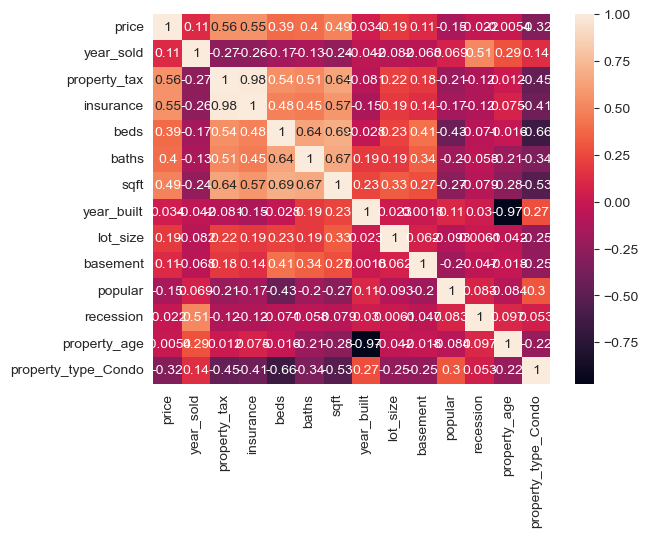

In [17]:
sns.heatmap(df.corr(), annot=True, )

### Decision Tree

In [21]:
#import linear regression model
from sklearn.tree import DecisionTreeRegressor

In [50]:
# create an instance of the model
dt = DecisionTreeRegressor(max_depth=10, max_features=10)

In [51]:
# train the model
dtmodel = dt.fit(x_train, y_train)

In [52]:
# make predictions on the test set
ypreddt = dtmodel.predict(x_test)


In [53]:
test_maedt = mean_absolute_error(y_test, ypreddt)
test_maedt

58702.43146014726

In [54]:
xpreddt = dtmodel.predict(x_train)
train_maedt = mean_absolute_error(y_train, xpreddt)
train_maedt

17927.612521373492

In [55]:
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Condo'], dtype=object)

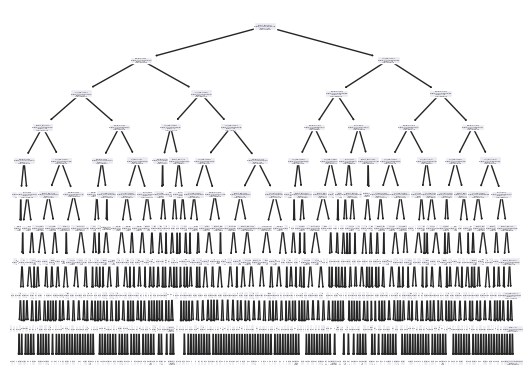

In [59]:
#plot the tree
from sklearn import tree

#plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

#save the plot to a file
plt.savefig('tree.png',dpi=300)

### Random Forest

In [60]:
# import random regressor model
from sklearn.ensemble import RandomForestRegressor

In [61]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=50, criterion='absolute_error')

In [62]:
# train the model
rfmodel = rf.fit(x_train, y_train)

In [63]:
# predictions
ypredrf = rfmodel.predict(x_test)

In [64]:
#evaluate
test_maerf = mean_absolute_error(ypredrf, y_test)
test_maerf

45422.20203753352

In [65]:
xpredrf = rfmodel.predict(x_train)
train_maerf = mean_absolute_error(y_train, xpreddt)
train_maerf

17927.612521373492

In [66]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [67]:
!pip3 install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [68]:
import pickle

In [69]:
# wb to write the model in binary form
pickle.dump(rfmodel, open('RF_Model', 'wb'))

In [70]:
# Load Model
Model = pickle.load(open('RF_Model', 'rb'))

In [71]:
Model.predict([[2013, 234, 81, 1, 1, 584, 2013, 0, 0, 0, 1, 0, 1]])

C:\Users\Rushanthi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([301881.4])